# Dutch Corpora

In [1]:
# make sure installation has succeeded
import tempo_embeddings

In [2]:
%load_ext autoreload

In [3]:
try:
    import google.colab

    IN_COLAB = True
except ModuleNotFoundError:
    IN_COLAB = False

## Load Database

In [4]:
%autoreload now

from pathlib import Path
from tqdm import tqdm
from tempo_embeddings.text.corpus import Corpus

/Users/jose/Repos/tempo-embeddings/.venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/jose/Repos/tempo-embeddings/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from tempo_embeddings.embeddings.vector_database import ChromaDatabaseManager

MODEL_NAME = "NetherlandsForensicInstitute/robbert-2022-dutch-sentence-transformers"

db = ChromaDatabaseManager(db_path="testing_db", embedder_name=MODEL_NAME, batch_size=24)
db.connect()

anp_duurzam = Corpus.from_chroma_db(db, collection_name="anp_duurzam", include_embeddings=True)

Retrieved existing collection 'anp_duurzam'
UMAP( verbose=True)
Tue Feb 13 19:57:44 2024 Construct fuzzy simplicial set
Tue Feb 13 19:57:44 2024 Finding Nearest Neighbors
Tue Feb 13 19:57:45 2024 Finished Nearest Neighbor Search
Tue Feb 13 19:57:46 2024 Construct embedding


Epochs completed:  24%| ██▎        118/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs


Epochs completed:  91%| █████████  454/500 [00:01]

	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs


Epochs completed: 100%| ██████████ 500/500 [00:01]

Tue Feb 13 19:57:48 2024 Finished embedding


In [6]:
for p in anp_duurzam.passages[:20]:
    print(len(p), p)

corpus = anp_duurzam

if corpus.embeddings is not None:
    print(corpus.embeddings.shape)

204 Passage('handelsakkoorden een bijdrage leveren aan de internationale duurzaamheidsagenda, inclusief natuurlijk uitvoering van het Parijse klimaatakkoord. Duurzaamheidshoofdstukken zijn in principe altijd onderdeel', {'': '2055', 'RecId': 'h-tk-20172018-26-4', 'chamber': 'TweedeKamer', 'date': '2017-11-23', 'highlighting': '-', 'speakers': 'De voorzitter :|De voorzitter :|De voorzitter :|Minister Kaag :|De voorzitter :|Minister Kaag :|De voorzitter :|Minister Kaag :|De voorzitter :|Mevrouw Becker ( VVD ):|De voorzitter :|Mevrouw Van Weerdenburg ( PVV ):|Minister Kaag :|Mevrouw Van Weerdenburg ( PVV ):|Minister Kaag :|Mevrouw Ouwehand ( PvdD ):|Minister Kaag :|Mevrouw Ouwehand ( PvdD ):|Minister Kaag :|De heer Hijink ( SP ):|Minister Kaag :|De voorzitter :|Minister Kaag :|Mevrouw Becker ( VVD ):|Minister Kaag :|De voorzitter :|Mevrouw Becker ( VVD ):|Minister Kaag :|De heer Hijink ( SP ):|Minister Kaag :|De heer Hijink ( SP ):|Minister Kaag :|De voorzitter :|Minister Kaag :|De heer V

## Read Stopwords

In [7]:
!wget --continue https://raw.githubusercontent.com/Semantics-of-Sustainability/tempo-embeddings/main/tempo_embeddings/data/stopwords-filter-nl.txt

zsh:1: command not found: wget


In [8]:
stopwords_file = Path("stopwords-filter-nl.txt")

with open(stopwords_file.absolute(), "rt") as f:
    stopwords = set(f.read().splitlines())

stopwords.update(
    {
        "wij",
        "we",
        "moeten",
        "heer",
        "mevrouw",
        "minister",
        "voorzitter",
        "gaat",
        "wel",
        "den",
    }
)

## Cluster

In [9]:
%autoreload now

# Arguments: min_cluster_size=10, cluster_selection_epsilon=0.1, ...
# See https://scikit-learn.org/stable/modules/generated/sklearn.cluster.HDBSCAN.html for full list

# e.g. min_samples=10, cluster_selection_epsilon=0.2, cluster_selection_method="leaf"
FILTER_TERMS = ["duurzaam"] 
clusters = corpus.cluster(min_cluster_size=10, cluster_selection_epsilon=0.1)
print(clusters)

[Subcorpus(-1, [0, 1, 8, 19, 20, 22, 23, 28, 29, 33]), Subcorpus(24, [2, 21, 61, 76, 110, 115, 124, 172, 189, 210]), Subcorpus(22, [3, 89, 129, 213, 223, 273, 359, 372, 382, 443]), Subcorpus(20, [4, 14, 16, 17, 24, 30, 31, 40, 54, 55]), Subcorpus(15, [5, 9, 94, 378, 469, 545, 624, 671, 680, 702]), Subcorpus(21, [6, 18, 47, 90, 91, 95, 113, 127, 144, 149]), Subcorpus(14, [7, 32, 38, 67, 69, 117, 204, 208, 209, 229]), Subcorpus(7, [10, 72, 111, 120, 171, 251, 256, 295, 299, 312]), Subcorpus(5, [11, 45, 65, 109, 175, 197, 215, 270, 351, 352]), Subcorpus(9, [12, 57, 398, 532, 590, 739, 758, 781, 792, 891]), Subcorpus(1, [13, 27, 86, 98, 123, 132, 134, 150, 152, 158]), Subcorpus(11, [15, 50, 77, 118, 119, 193, 253, 317, 328, 338]), Subcorpus(18, [25, 26, 34, 64, 99, 106, 107, 203, 211, 230]), Subcorpus(6, [36, 100, 177, 185, 373, 531, 555, 814, 855, 970]), Subcorpus(2, [41, 101, 138, 183, 269, 281, 300, 339, 350, 357]), Subcorpus(17, [42, 146, 257, 444, 609, 689, 1018, 1074, 1123, 1152]), S

In [10]:
for cluster in clusters:
    cluster.set_topic_label(exclude_words=frozenset(stopwords | set(FILTER_TERMS)), n=5)
    print(cluster)

Subcorpus('Outliers', [0, 1, 8, 19, 20, 22, 23, 28, 29, 33])
Subcorpus('motie; dag; orde; voorgesteld; binnenhof', [2, 21, 61, 76, 110, 115, 124, 172, 189, 210])
Subcorpus('kabinet; duurzaamheid; mensen; gaan; goed', [3, 89, 129, 213, 223, 273, 359, 372, 382, 443])
Subcorpus('duurzaamheid; bedrijven; goed; heel; alleen', [4, 14, 16, 17, 24, 30, 31, 40, 54, 55])
Subcorpus('energie; duurzame; aandeel; brandstof; eneco', [5, 9, 94, 378, 469, 545, 624, 671, 680, 702])
Subcorpus('duurzaamheid; dank; cda; partij; vvd', [6, 18, 47, 90, 91, 95, 113, 127, 144, 149])
Subcorpus('verduurzaamd; woningen; gebouwd; huurders; hoeveel', [7, 32, 38, 67, 69, 117, 204, 208, 209, 229])
Subcorpus('boeren; landbouw; bodem; bodembeheer; onze', [10, 72, 111, 120, 171, 251, 256, 295, 299, 312])
Subcorpus('eten; gezond; d66; eiwitten; dierlijke', [11, 45, 65, 109, 175, 197, 215, 270, 351, 352])
Subcorpus('nederland; kabinet; pensioenfondsen; kapitaal; hernieuwbare', [12, 57, 398, 532, 590, 739, 758, 781, 792, 89

/Users/jose/Repos/tempo-embeddings/.venv/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [11]:
with open("clusters.txt", "wt") as f:
    for cluster in clusters:
        print(
            ", ".join(
                cluster.top_words(
                    exclude_words=frozenset(stopwords | set(FILTER_TERMS)), n=5
                )
            ),
            file=f,
        )

# Visualize Embeddings

<Axes: xlabel='x', ylabel='y'>

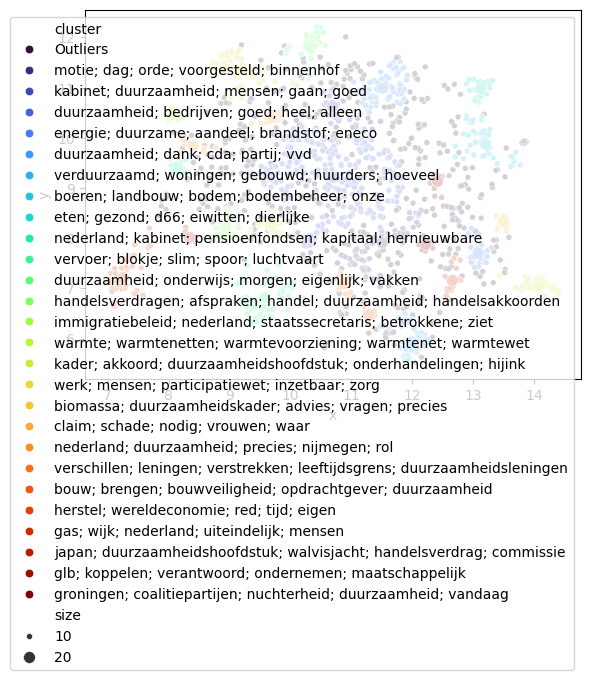

In [12]:
%autoreload now

from tempo_embeddings.visualization.clusters import ClusterVisualizer

visualizer = ClusterVisualizer(*clusters)
visualizer.visualize()

In [13]:
import os
from bokeh.io import output_notebook
from bokeh.plotting import show
from tempo_embeddings.visualization.bokeh import BokehInteractiveVisualizer


output_notebook()

visualizer = BokehInteractiveVisualizer(
    *clusters, metadata_fields=corpus.metadata_fields(), width=2000, height=1000
)

os.environ[
    "BOKEH_ALLOW_WS_ORIGIN"
] = "*"

show(visualizer.create_document)

Loading BokehJS ...

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : fill_color='label' [no close matches], hatch_color='label' [no close matches], line_color='label' [no close matches], x='x' [no close matches], y='y' [no close matches] {renderer: GlyphRenderer(id='p1580', ...)}
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : fill_color='label' [no close matches], hatch_color='label' [no close matches], line_color='label' [no close matches], x='x' [no close matches], y='y' [no close matches] {renderer: GlyphRenderer(id='p1482', ...)}
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column